In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=15

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "domatesfotograflari",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 800 files belonging to 8 classes.


In [4]:
class_names = dataset.class_names
class_names

['Domates_Gec_Yaniklik_Hastaligi',
 'Domates_Mantar_Hastaligi',
 'Domates_Mozaik_Virusu',
 'Domates_Orumcek_Akari',
 'Domates_Saglikli',
 'Domates_Sari_Yaprak_Kivircik_Virusu',
 'Domates_Septoria_Yaprak_Lekesi',
 'Domates_Yaprak_Kufu']

In [5]:
len(dataset)

25

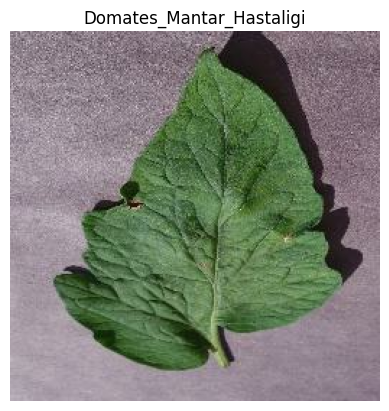

In [6]:
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    

In [7]:
train_size = 0.8
len(dataset)*train_size

20.0

In [8]:
train_ds = dataset.take(54)
len(train_ds)

25

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [10]:
val_size = 0.1
len(dataset)*val_size

2.5

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

20

In [16]:
len(val_ds)

2

In [17]:
len(test_ds)

3

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

Epoch 1/15
20/20 [==============================] - 61s 3s/step - loss: 2.0817 - accuracy: 0.1375 - val_loss: 2.0785 - val_accuracy: 0.0938
Epoch 2/15
20/20 [==============================] - 52s 3s/step - loss: 2.0775 - accuracy: 0.1359 - val_loss: 2.0748 - val_accuracy: 0.0938
Epoch 3/15
20/20 [==============================] - 45s 2s/step - loss: 2.0549 - accuracy: 0.1562 - val_loss: 2.0236 - val_accuracy: 0.1719
Epoch 4/15
20/20 [==============================] - 46s 2s/step - loss: 1.9099 - accuracy: 0.3156 - val_loss: 1.9197 - val_accuracy: 0.2812
Epoch 5/15
20/20 [==============================] - 45s 2s/step - loss: 1.9606 - accuracy: 0.2172 - val_loss: 1.9423 - val_accuracy: 0.2812
Epoch 6/15
20/20 [==============================] - 45s 2s/step - loss: 1.7719 - accuracy: 0.3453 - val_loss: 1.8392 - val_accuracy: 0.3750
Epoch 7/15
20/20 [==============================] - 54s 3s/step - loss: 1.5515 - accuracy: 0.4297 - val_loss: 1.7726 - val_accuracy: 0.3594
Epoch 8/15
20/20 [==

In [25]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 5s 990ms/step - loss: 0.6420 - accuracy: 0.7604


In [26]:
scores

[0.641996443271637, 0.7604166865348816]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 20}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
type(history.history['loss'])

list

In [31]:
len(history.history['loss'])

15

In [32]:
history.history['loss'][:5]

[2.0816876888275146,
 2.0775318145751953,
 2.0549018383026123,
 1.9099012613296509,
 1.9605671167373657]

In [33]:
acc = history.history['accuracy']

loss = history.history['loss']

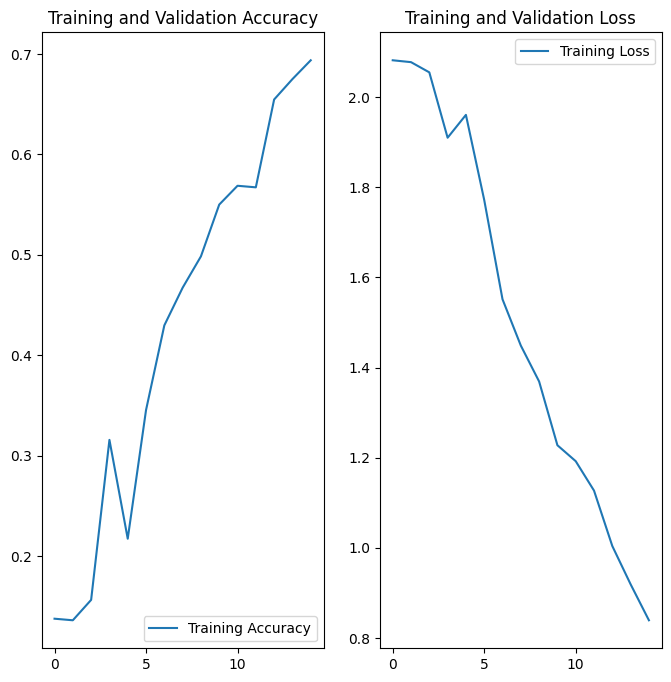

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Domates_Mozaik_Virusu
1/1 [==============================] - 1s 1s/step
predicted label: Domates_Mozaik_Virusu


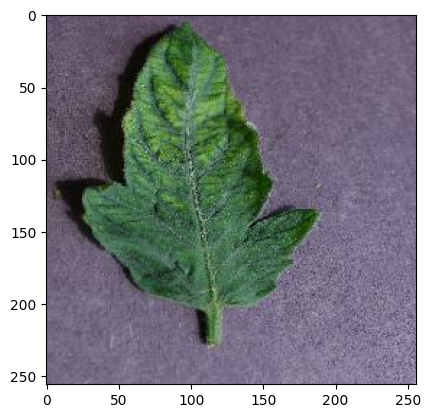

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 98ms/step


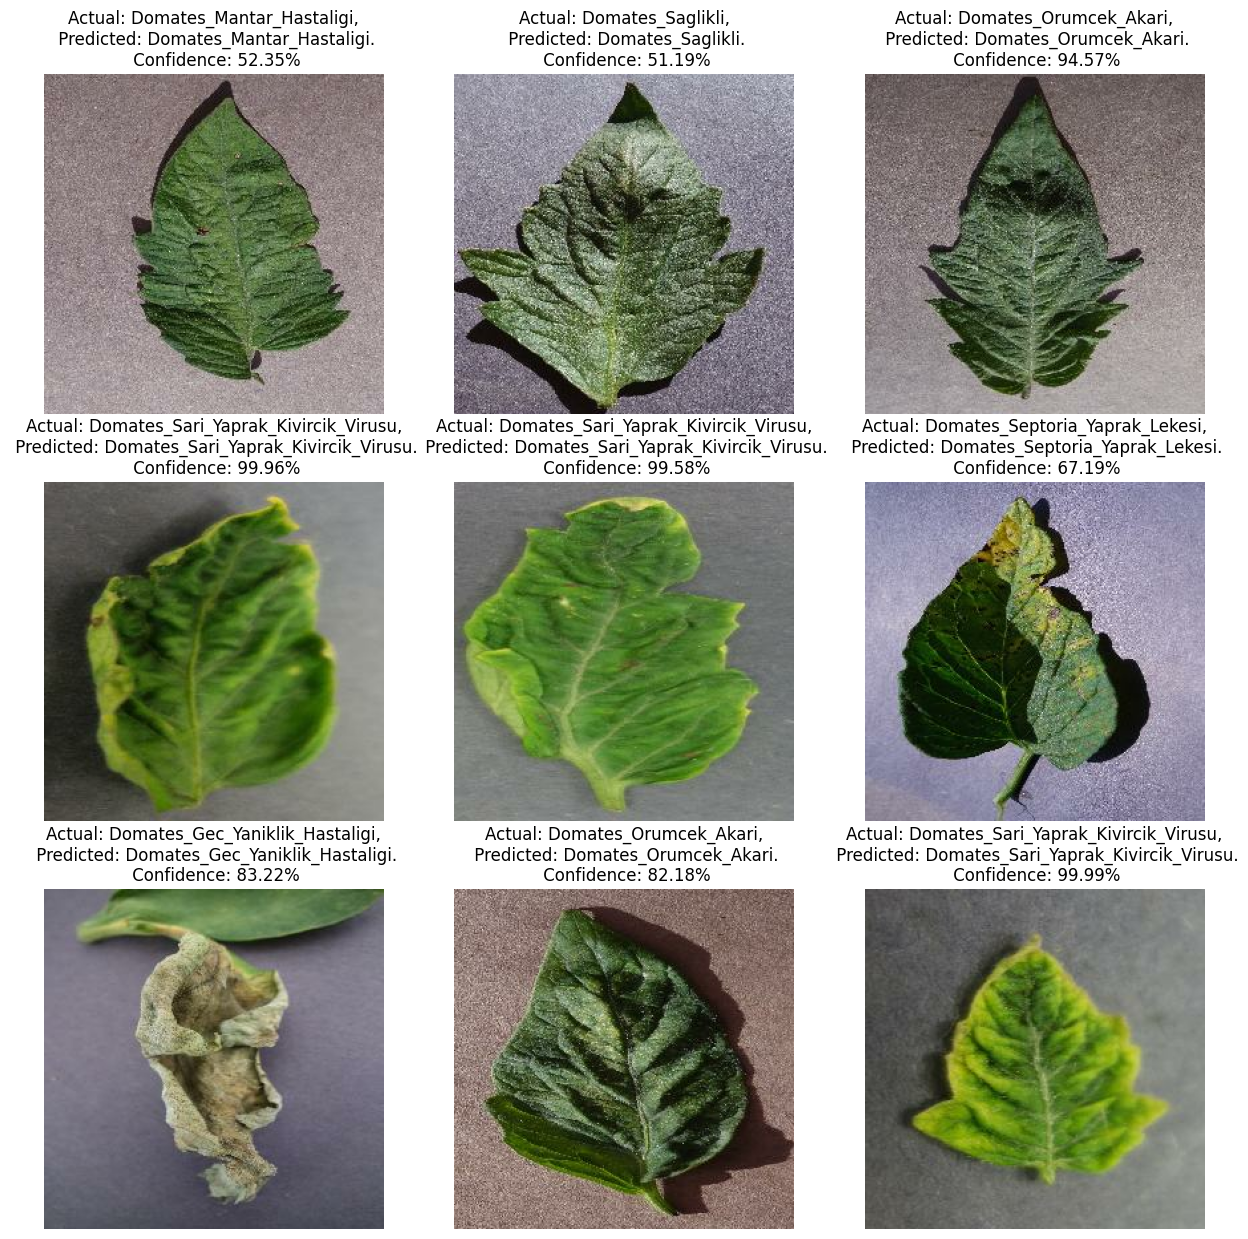

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [39]:
model.save("../domates.h5")

In [40]:
print(tf. __version__) 

2.11.0


NameError: name 'PIL' is not defined